In [54]:
!pip install https://github.com/elyase/geotext/archive/master.zip
!pip install topojson
    

  Using cached https://github.com/elyase/geotext/archive/master.zip
  Created wheel for geotext: filename=geotext-0.3.0-py2.py3-none-any.whl size=2272453 sha256=520a2b522551f4717bae358db4bd8dcdf925bf93660e6ee893db48a15ed618d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-kr3izqtn/wheels/c3/82/e9/208ca98c5e7fd6edcd87669e8270db1d858cd078d230452cd5
Successfully built geotext
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [56]:
!pip install country_converter --upgrade


Requirement already up-to-date: country_converter in /opt/conda/lib/python3.7/site-packages (0.7.3)
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


Import Required Libraries

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from geotext import GeoText
import json
import topojson
import country_converter as coco
from nltk.stem import LancasterStemmer, SnowballStemmer, RegexpStemmer, WordNetLemmatizer 
#this was part of the NLP notebook
import nltk
nltk.download('punkt')
#import sentence tokenizer
from nltk import sent_tokenize
#import word tokenizer
from nltk import word_tokenize
#list of stopwords
from nltk.corpus import stopwords
import string
#import geograpy
import emoji
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
covid_df=pd.read_csv('../input/covid19-tweets/covid19_tweets.csv')

## Location Analysis

In [59]:
covid_df.head(
)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [60]:
covid_df.shape

(179108, 13)

In [61]:
Location_count=pd.DataFrame(covid_df['user_location'].value_counts())

Lets take a look at the number of twwets from different locations around the world

In [62]:
Location_count.head()

,user_location
India,3741
United States,2455
"New Delhi, India",1721
"Mumbai, India",1401
"Washington, DC",1354


In [63]:
Location_count.reset_index(inplace=True)

In [64]:
Location_count.rename(columns={'index':'Location','user_location':'count'},inplace=True)

In [65]:
Location_count.sort_values(by='count',inplace=True,ascending=False)

In [66]:
#Location_count

The information is a bit confusing since the locations treat countries and cities similarly

In [67]:
Count_graph=px.bar(x='count',y='Location',data_frame=Location_count[:15],color='Location')
Count_graph.show()

In [68]:
Location_count.shape

(26920, 2)

In [69]:
location=Location_count.loc[2]['Location']

We'll use GeoText to extract the country which city belongs to , so that we can get a picture of number of tweets from each countries

In [70]:
print(GeoText(location).countries)

['India']


In [71]:
Location_country=Location_count.copy()

In [72]:
Location_country['Location']=Location_country['Location'].apply(lambda x:x.replace(',',' '))

In [73]:
#Location_country

In [74]:
Location_country['Location']=Location_country['Location'].apply(lambda x:(GeoText(x).country_mentions))

In [75]:
Location_country.head()

,Location,count
0,{'IN': 1},3741
1,{'US': 1},2455
2,{'IN': 2},1721
3,{'IN': 2},1401
4,{'GB': 1},1354


In [76]:
Location_country.drop(Location_country[Location_country['Location']=='[]'].index,inplace=True)

In [77]:
Location_country['Location']=Location_country['Location'].apply(lambda x:(x.keys()))

In [78]:
Location_country['Location']=Location_country['Location'].apply(lambda x:list(x))

In [79]:
Location_country.drop(Location_country.index[Location_country.Location.map(len)==0],inplace=True)

In [80]:
#Location_country

In [81]:
Location_country['Location']=Location_country['Location'].apply(lambda x:str(x[0]))

In [82]:
#Location_country

In [83]:
agg_func={'count':'sum'}
Location_country=Location_country.groupby(['Location']).aggregate(agg_func)

This is how the dataframe looks after aggregating the count(after factoring in the cities) for each country

In [84]:
Location_country.head()

,count
Location,
AE,701
AF,74
AL,22
AM,62
AO,3


In [85]:
Location_country.sort_values(by=['count'],ascending=False,inplace=True)
Location_country.reset_index(inplace=True)
Location_country.columns

Index(['Location', 'count'], dtype='object')

In [86]:
#Location_country['Location']=Location_country['Location'].apply(lambda x:x[2:-2])

In [87]:
Count_graph=px.bar(x='Location',y='count',data_frame=Location_country[:15],color='Location')
Count_graph.show()

In [88]:
cc = coco.CountryConverter()
Location_country['Location']=Location_country['Location'].apply(lambda x:cc.convert(names=x,to='ISO3'))

In [89]:
Location_country

,Location,count
0,USA,29341
1,IND,18818
2,GBR,12803
3,CAN,5560
4,AUS,4730
...,...,...
191,FLK,1
192,BVT,1
193,CAF,1
194,STP,1


The below map shows number of tweets from each countries.

In [90]:
tweets=pd.DataFrame(covid_df['text'])

## Sentiment Analysis

Let's try to understand the sentiment of tweets. 

In [91]:
tweets

,text
0,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...
4,25 July : Media Bulletin on Novel #CoronaVirus...
...,...
179103,Thanks @IamOhmai for nominating me for the @WH...
179104,2020! The year of insanity! Lol! #COVID19 http...
179105,@CTVNews A powerful painting by Juan Lucena. I...
179106,"More than 1,200 students test positive for #CO..."


Before we try to do our analysis some pre-processing is required on these tweets. 

fuctions to remove emojis

In [92]:
import re
def char_is_emoji(character):
    return character in emoji.UNICODE_EMOJI
#does the text contain an emoji?
def text_has_emoji(text):
    for character in text:
        if character in emoji.UNICODE_EMOJI:
            return True
    return False
#remove the emoji
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

Function to remove punctuations.

In [93]:
punct =[]
punct += list(string.punctuation)
punct += '’'
punct.remove("'")
def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, ' ')
    return text

In [94]:
def nlp(df):
    # lowercase everything
    # get rid of '\n' from whitespace
    # regex remove hyperlinks
    # removing '&gt;'
    # check for emojis
    # remov
        # lowercase everything
    df['token'] = df['text'].apply(lambda x: x.lower())
    # get rid of '\n' from whitespace 
    df['token'] = df['token'].apply(lambda x: x.replace('\n', ' '))
    # regex remove hyperlinks
    df['token'] = df['token'].str.replace('http\S+|www.\S+', '', case=False)
    # removing '&gt;'
    df['token'] = df['token'].apply(lambda x: x.replace('&gt;', ''))
    # Checking if emoji in tokens column, use for EDA purposes otherwise not necessary to keep this column
    df['emoji'] = df['token'].apply(lambda x: text_has_emoji(x))
    # Removing Emojis from tokens
    #df['token'] = df['token'].apply(lambda x: deEmojify(x))
    # remove punctuations
    #df['token'] = df['token'].apply(remove_punctuations)
    # remove ' s ' that was created after removing punctuations
    df['token'] = df['token'].apply(lambda x: str(x).replace(" s ", " "))
    return df

In [95]:
tweets1=(nlp(tweets))

In [96]:
(tweets1)

,text,token,emoji
0,If I smelled the scent of hand sanitizers toda...,if i smelled the scent of hand sanitizers toda...,False
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey @yankees @yankeespr and @mlb - wouldn't it...,False
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realdonaldtrump trump nev...,False
3,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv the one gift #covid19 has give me...,False
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 july : media bulletin on novel #coronavirus...,False
...,...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,thanks @iamohmai for nominating me for the @wh...,False
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! the year of insanity! lol! #covid19,False
179105,@CTVNews A powerful painting by Juan Lucena. I...,@ctvnews a powerful painting by juan lucena. i...,False
179106,"More than 1,200 students test positive for #CO...","more than 1,200 students test positive for #co...",False


#### WordCloud

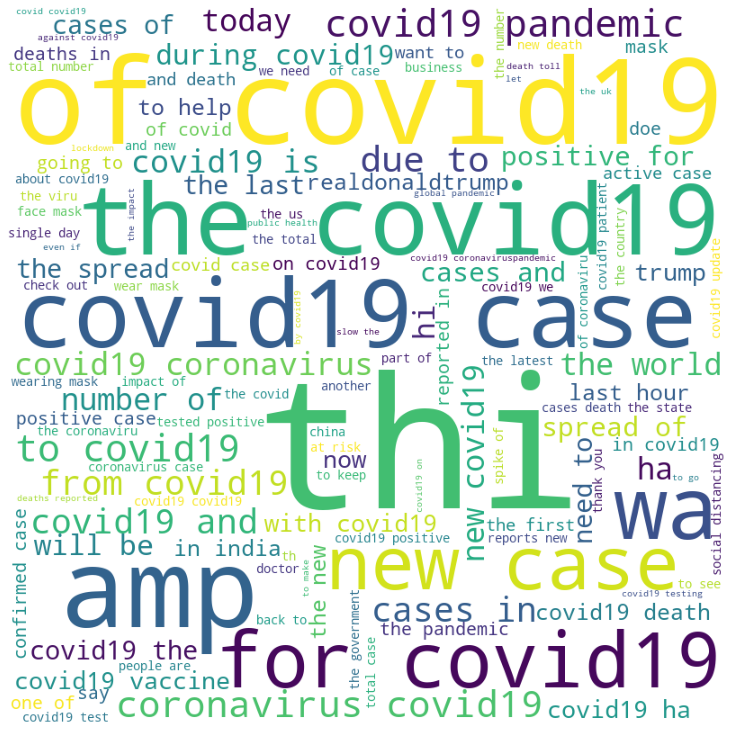

In [97]:
comment_words=''
for val in tweets1.token: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10,10), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 